-2
-2
-2
6
6
12
11
22
21
29
40
54
64
78
80
94
101
107
119
124
129
134
148
149
154
166
157
171
183
197
201
197
211
222
229
235
241
243
254
261
270
281
275
284
292
302
312
316
324
327
330
339
336
338
348
351
341
366


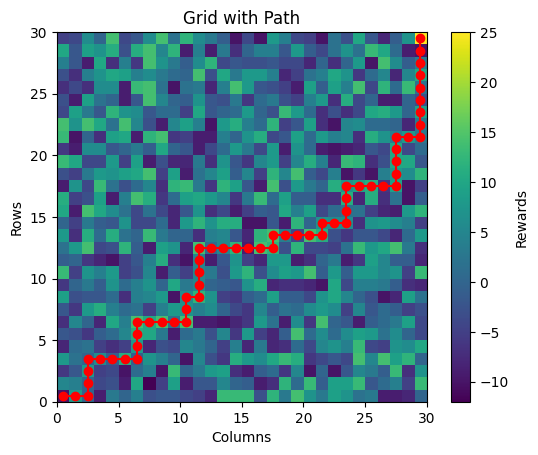

Obtained Path:
[(29, 0), (29, 1), (29, 2), (28, 2), (27, 2), (26, 2), (26, 3), (26, 4), (26, 5), (26, 6), (25, 6), (24, 6), (23, 6), (23, 7), (23, 8), (23, 9), (23, 10), (22, 10), (21, 10), (21, 11), (20, 11), (19, 11), (18, 11), (17, 11), (17, 12), (17, 13), (17, 14), (17, 15), (17, 16), (17, 17), (16, 17), (16, 18), (16, 19), (16, 20), (16, 21), (15, 21), (15, 22), (15, 23), (14, 23), (13, 23), (12, 23), (12, 24), (12, 25), (12, 26), (12, 27), (11, 27), (10, 27), (9, 27), (8, 27), (8, 28), (8, 29), (7, 29), (6, 29), (5, 29), (4, 29), (3, 29), (2, 29), (1, 29), (0, 29)]
Total Cumulative Reward for Obtained Path: 366


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the grid from the Excel file
grid_data = pd.read_excel('Grid.xlsx', header=None)
N = len(grid_data)

# Initialize Q-values with zeros
Q_values = np.zeros((N, N, 2))  # 2 actions: move right or move up

# Hyperparameters
alpha = 0.5  # Learning rate
gamma = 0.8  # Discount factor
epochs = 10000  # Number of iterations

# Function to get the available actions for a given state
def available_actions(state):
    actions = []
    if state[1] < N - 1:  # Can move right
        actions.append(0)  # 0 represents moving right
    if state[0] < N - 1:  # Can move up
        actions.append(1)  # 1 represents moving up
    return actions if actions else [0]  # Return [0] if no actions available

# Q-learning algorithm
for epoch in range(epochs):
    # Start from the bottom-left cell
    state = (N - 1, 0)

    while state != (0, N - 1):  # Continue until reaching the top-right cell
        # Choose an action epsilon-greedily (explore or exploit)
        if np.random.rand() < 0.1:
            action = np.random.choice(available_actions(state))
        else:
            action = np.argmax(Q_values[state[0], state[1]])

        # Take the chosen action and observe the next state and reward
        if action == 0:  # Move right
            next_state = (state[0], state[1] + 1)
        else:  # Move up
            next_state = (state[0] - 1, state[1])

        # Check if the next_state is within bounds
        if 0 <= next_state[0] < N and 0 <= next_state[1] < N:
            reward = grid_data.iloc[next_state]

            # Update Q-value using the Q-learning update rule
            Q_values[state[0], state[1], action] = (1 - alpha) * Q_values[state[0], state[1], action] + \
                                                   alpha * (reward + gamma * np.max(Q_values[next_state[0], next_state[1]]))

            # Move to the next state
            state = next_state
        else:
            break  # Break if the next state is out of bounds

# Extract the learned policy
policy = np.argmax(Q_values, axis=2)

#  Find the path using the learned policy
path = [(N - 1, 0)]
cumulative_reward = -10  # Initialize cumulative reward

while path[-1] != (0, N - 1):
    action = policy[path[-1][0], path[-1][1]]
    if action == 0:  # Move right
        next_cell = (path[-1][0], path[-1][1] + 1)
    else:  # Move up
        next_cell = (path[-1][0] - 1, path[-1][1])

    # Accumulate reward from the next state
    cumulative_reward += grid_data.at[next_cell[0], next_cell[1]]

    print(cumulative_reward)
    path.append(next_cell)

# Plot the grid with the path (starting from top-left)
plt.imshow(grid_data, cmap='viridis', origin='upper', extent=(0, N, 0, N))
plt.plot([x[1] + 0.5 for x in path], [N - 1 - x[0] + 0.5 for x in path], marker='o', color='red')
plt.title('Grid with Path')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.colorbar(label='Rewards')
plt.show()

# Print the obtained path
print("Obtained Path:")
print(path)

# Print the total cumulative reward for the obtained path
print("Total Cumulative Reward for Obtained Path:", cumulative_reward)
